In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def sample_theta_cosn(N, n):
    samples = []
    with tqdm(total=N, desc=f"Sampling θ, cos^{n}(θ)") as pbar:
        while len(samples) < N:
            theta_candidate = np.random.uniform(0, np.pi/2)
            p = np.cos(theta_candidate)**n
            if np.random.uniform(0, 1) < p:
                samples.append(theta_candidate)
                pbar.update(1)
    return np.array(samples)

In [11]:
n = 2
theta = sample_theta_cosn(int(5e4),n)

Sampling θ, cos^2(θ): 100%|██████████| 50000/50000 [00:00<00:00, 60094.52it/s]


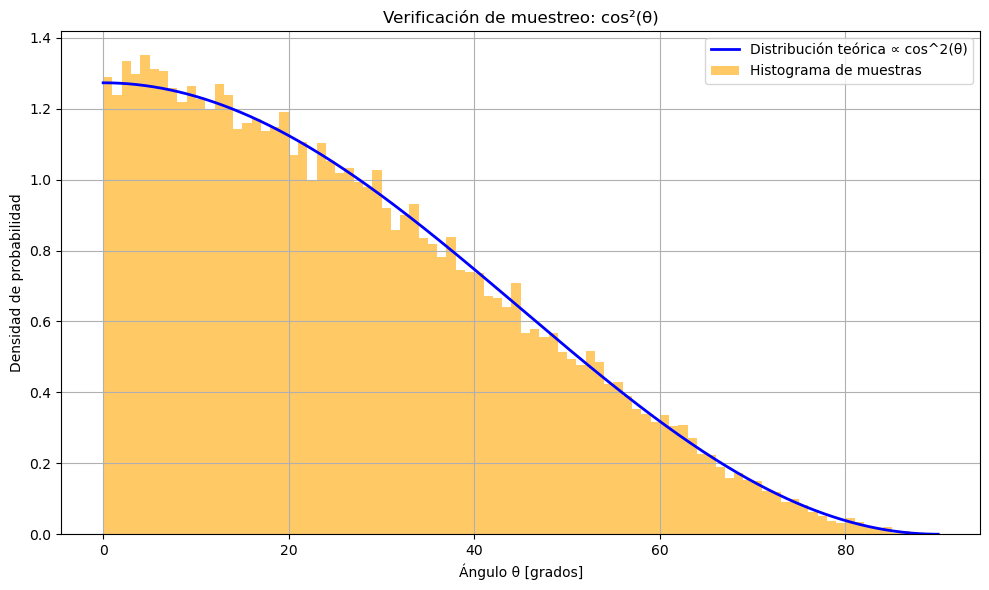

In [12]:
counts, bins = np.histogram(theta, bins=90, range=(0, np.pi/2), density=True)
bin_centers_rad = 0.5 * (bins[:-1] + bins[1:])
bin_centers_deg = np.rad2deg(bin_centers_rad)

theta_vals = np.linspace(0, np.pi/2, 1000)
pdf = np.cos(theta_vals)**2
pdf /= np.trapz(pdf, theta_vals) # Normalization

plt.figure(figsize=(10, 6))
plt.bar(bin_centers_deg, counts, width=np.rad2deg(bins[1]-bins[0]), alpha=0.6,
        label='Histograma de muestras', color='orange')
plt.plot(np.rad2deg(theta_vals), pdf, 'b-', linewidth=2, label=f'Distribución teórica ∝ cos^{n}(θ)')
plt.xlabel('Ángulo θ [grados]')
plt.ylabel('Densidad de probabilidad')
plt.title('Verificación de muestreo: cos²(θ)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()